# CS 681 Assignment 1 Muhammad Adnan Rizqullah 2403851

## Dataset download
In this step goal is to make the dataset ready to be used in the Jupyter notebook runtime. the dataset gets downloaded into the runtime of the Jupyter notebook for further processing.

In [4]:
from sklearn.datasets import fetch_20newsgroups

cats = ['rec.autos', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

## Dateset exploration
In this step the goal is to know how best to preprocess the dataset. We also want to know whether there are any empty values and whether the dataset has balanced class distribution. 

In [5]:
from collections import Counter
import random

print(f"Number of training samples: {len(newsgroups_train.data)}")
print(f"Categories (classes): {newsgroups_train.target_names}")

category_dist = Counter([newsgroups_train.target_names[target] for target in newsgroups_train.target])
print("\nSamples per category:")
for category, count in category_dist.items():
    print(f"{category}: {count}")

print("\nDataset attributes:")
for key in newsgroups_train.keys():
    print(f"- {key}")
    print(newsgroups_train[key][0])


Number of training samples: 1178
Categories (classes): ['comp.graphics', 'rec.autos']

Samples per category:
comp.graphics: 584
rec.autos: 594

Dataset attributes:
- data
From: dave.mikelson@almac.co.uk (Dave Mikelson) 
Subject: Re: PCX
Distribution: world
Organization: Almac BBS Ltd. +44 (0)324 665371
Reply-To: dave.mikelson@almac.co.uk (Dave Mikelson) 
Lines: 22

To: ad994@Freenet.carleton.ca

JW> 1) Where is there a book or code that will teach me how
JW> to read and write pcx,dbf,and gif files?

JW> 2) How do I access the extra ram on my paradise video board
JW> so I can do paging in the higher vga modes ie: 320x200x256
JW> 800x600x256

JW> 3) anybody got a line on a good book to help answer these question?

Here are some that I have that are very good:

  Graphics File Formats, Kay and Levine, ISBN 0-8306-3059-7
  Supercharged Bitmapped Graphics, Rimmer, ISBN 0-8306-3788-5
  Programmer's Guide to the EGA and VGA Cards, Ferraro,
     ISBN 0-201-57025-4 (has a whole chapter on Parad

In [6]:
target_1_indices = [i for i in range(len(newsgroups_train.target)) if newsgroups_train.target[i] == 1]

indices_to_remove = random.sample(target_1_indices, 10)

mask = [i not in indices_to_remove for i in range(len(newsgroups_train.data))]

newsgroups_train.data = [d for d, keep in zip(newsgroups_train.data, mask) if keep]
newsgroups_train.target = [t for t, keep in zip(newsgroups_train.target, mask) if keep]

category_dist = Counter([newsgroups_train.target_names[target] for target in newsgroups_train.target])
print("\nNew samples per category:")
for category, count in category_dist.items():
    print(f"{category}: {count}")


New samples per category:
comp.graphics: 584
rec.autos: 584


In [7]:
import pandas as pd

df = pd.DataFrame({
    'data': newsgroups_train.data,
    'label': newsgroups_train.target,
    'label_text': [newsgroups_train.target_names[i] for i in newsgroups_train.target],
})

df.head()

,data,label,label_text
0,From: dave.mikelson@almac.co.uk (Dave Mikelson...,0,comp.graphics
1,From: scott@osi.com (Scott Fleming)\nSubject: ...,0,comp.graphics
2,From: jdmooney@kocrsv01.delcoelect.com (John D...,1,rec.autos
3,From: ae015@Freenet.carleton.ca (Steve Hui)\nS...,1,rec.autos
4,From: madman@austin.ibm.com (Steve Heracleous)...,1,rec.autos


Dataset shape: (1168, 3)

Columns and data types:
data          object
label          int64
label_text    object
dtype: object

Missing values per column:
data          0
label         0
label_text    0
dtype: int64


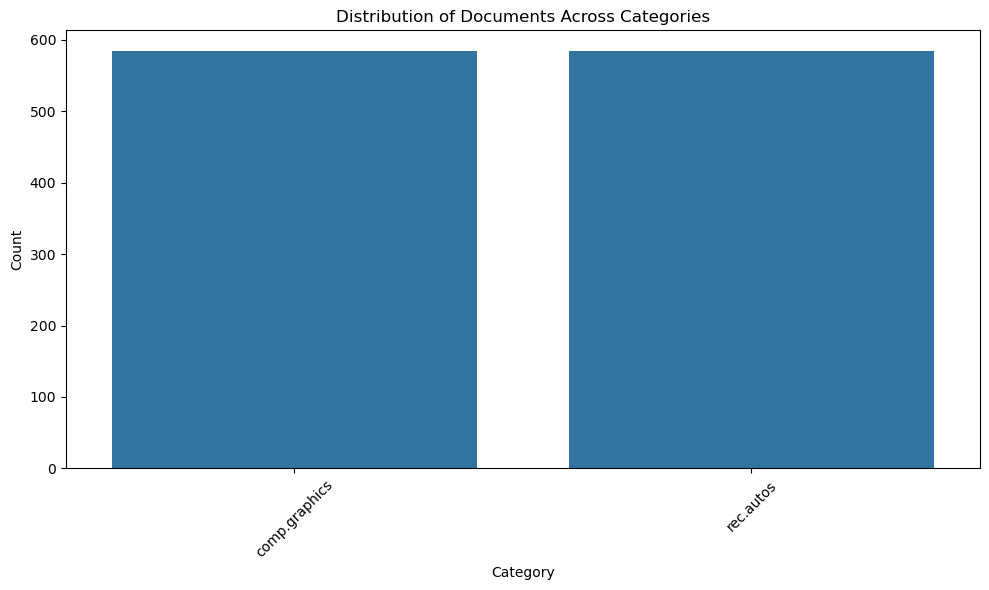

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

print("Dataset shape:", df.shape)
print("\nColumns and data types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label_text')
plt.xticks(rotation=45)
plt.title('Distribution of Documents Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Data preprocessing
In this step the goal is to remove unwanted characters from the dataset, the ones that might negatively impact or at least have no value in the machine learning task.

In [9]:
import re

def special_char_remover(text):
    total_chars = len(text)
    
    text_clean = re.sub(r'[^a-zA-Z0-9\s.,!?-]', '', text)
    special_chars_removed = total_chars - len(text_clean)
    
    return text_clean, special_chars_removed, total_chars

results = df['data'].apply(special_char_remover)

df['no_special_char'] = results.apply(lambda x: x[0])
df['special_char_removed'] = results.apply(lambda x: x[1])
df['original_chars'] = results.apply(lambda x: x[2])

print("Preprocessing Statistics:")
print(f"Total characters in dataset: {df['original_chars'].sum():,}")
print(f"Total special chars filtered: {df['special_char_removed'].sum():,}")
print(f"Percentage of special chars: {(df['special_char_removed'].sum() / df['original_chars'].sum() * 100):.2f}%")
print(f"Average special chars per document: {df['special_char_removed'].mean():.2f}")

print("\nExamples where special characters were found:")
special_rows = df[df['special_char_removed'] > 0].head(2)
for idx, row in special_rows.iterrows():
    print(f"Total chars: {row['original_chars']:,}")
    print(f"Special chars removed: {row['special_char_removed']:,} ({row['special_char_removed']/row['original_chars']*100:.2f}%)")
    print(f"==============Original==============\n {row['data'][:200]}...")
    print(f"==============Processed==============\n {row['no_special_char'][:200]}...")

Preprocessing Statistics:
Total characters in dataset: 1,753,084
Total special chars filtered: 79,434
Percentage of special chars: 4.53%
Average special chars per document: 68.01

Examples where special characters were found:
Total chars: 966
Special chars removed: 34 (3.52%)
==============Original==============
 From: dave.mikelson@almac.co.uk (Dave Mikelson) 
Subject: Re: PCX
Distribution: world
Organization: Almac BBS Ltd. +44 (0)324 665371
Reply-To: dave.mikelson@almac.co.uk (Dave Mikelson) 
Lines: 22

To:...
==============Processed==============
 From dave.mikelsonalmac.co.uk Dave Mikelson 
Subject Re PCX
Distribution world
Organization Almac BBS Ltd. 44 0324 665371
Reply-To dave.mikelsonalmac.co.uk Dave Mikelson 
Lines 22

To ad994Freenet.car...
Total chars: 845
Special chars removed: 17 (2.01%)
==============Original==============
 From: scott@osi.com (Scott Fleming)
Subject: Sun IPX root window display - background picture
Keywords: sun ipx background picture
Organization: Obje

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def stop_words_remover(text):
    stop_words = set(stopwords.words('english'))
    
    words = word_tokenize(text.lower())
    
    total_words = len(words)
    
    filtered_words = [word for word in words if word not in stop_words]
    stops_removed = total_words - len(filtered_words)
    
    processed_text = ' '.join(filtered_words)
    
    return processed_text, stops_removed, total_words

results = df['no_special_char'].apply(stop_words_remover)

df['no_special_char_stops'] = results.apply(lambda x: x[0])
df['stops_removed'] = results.apply(lambda x: x[1])
df['original'] = results.apply(lambda x: x[2])

print("Stop Words Removal Statistics:")
print(f"Total words in dataset: {df['original'].sum():,}")
print(f"Total stop words removed: {df['stops_removed'].sum():,}")
print(f"Percentage of stop words: {(df['stops_removed'].sum() / df['original'].sum() * 100):.2f}%")
print(f"Average stop words per document: {df['stops_removed'].mean():.2f}")

print("\nExamples of stop words removal:")
example_rows = df.head(2)
for idx, row in example_rows.iterrows():
    print(f"Total words: {row['original']}")
    print(f"Stop words removed: {row['stops_removed']} ({row['stops_removed']/row['original']*100:.2f}%)")
    print(f"==============Original==============\n {row['no_special_char'][:200]}...")
    print(f"==============Processed==============\n {row['no_special_char_stops'][:200]}...")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/madnanrizqu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madnanrizqu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stop Words Removal Statistics:
Total words in dataset: 294,129
Total stop words removed: 99,733
Percentage of stop words: 33.91%
Average stop words per document: 85.39

Examples of stop words removal:
Total words: 152
Stop words removed: 48 (31.58%)
==============Original==============
 From dave.mikelsonalmac.co.uk Dave Mikelson 
Subject Re PCX
Distribution world
Organization Almac BBS Ltd. 44 0324 665371
Reply-To dave.mikelsonalmac.co.uk Dave Mikelson 
Lines 22

To ad994Freenet.car...
==============Processed==============
 dave.mikelsonalmac.co.uk dave mikelson subject pcx distribution world organization almac bbs ltd. 44 0324 665371 reply-to dave.mikelsonalmac.co.uk dave mikelson lines 22 ad994freenet.carleton.ca jw 1 ...
Total words: 163
Stop words removed: 52 (31.90%)
==============Original==============
 From scottosi.com Scott Fleming
Subject Sun IPX root window display - background picture
Keywords sun ipx background picture
Organization Objective Systems Integrators, Folsom Ca

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

vectorizer = CountVectorizer(
    max_features=20000,
)

X = vectorizer.fit_transform(df['no_special_char_stops'])

vocab_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print("\nVectorization Statistics:")
print(f"Number of documents: {X.shape[0]}")
print(f"Vocabulary size: {X.shape[1]}")
print(f"Total words: {X.sum():,}")

word_counts = np.asarray(X.sum(axis=0)).ravel()
word_freq = pd.DataFrame({
    'term': vectorizer.get_feature_names_out(),
    'count': word_counts
})
print("\nTop 10 most frequent terms:")
print(word_freq.sort_values('count', ascending=False).head(10))


Vectorization Statistics:
Number of documents: 1168
Vocabulary size: 20000
Total words: 166,526

Top 10 most frequent terms:
               term  count
6832            edu   1990
5377            com   1292
16940       subject   1239
11326         lines   1236
13194  organization   1152
4795            car    860
3569        article    736
19578         would    724
19603        writes    716
18462    university    624


## Dataset split
In this step we want to have a split where more data is allocated to the training set but enough data is there to evaluate the model properly in the test set.

In [12]:
from sklearn.model_selection import train_test_split

# Split the data
X = df['no_special_char_stops']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

print("\nLabels in y_train:")
print(y_train.value_counts())
print("\nLabels in y_test:")
print(y_test.value_counts())

Length of X_train: 934
Length of y_train: 934
Length of X_test: 234
Length of y_test: 234

Labels in y_train:
label
1    474
0    460
Name: count, dtype: int64

Labels in y_test:
label
0    124
1    110
Name: count, dtype: int64


## Vectorization
In this step we transform the text into numerical representations that can be consumed by the computer and by extension the machine learning algorithms.

## Model training
In this step the goal is to train Logistic Regression and Naive Bayes for task classification. For the IMDB dataset we particularly do Sentiment Analysis.

## Model testing
In this step the goal is to find out the effects of vector embedding choice with model accuray on task classification.


In [16]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

print("Training word2vec for later steps...")

tokenized_train_texts = [word_tokenize(text.lower()) for text in X_train]

w2v_model = Word2Vec(
    sentences=tokenized_train_texts,
    vector_size=300, 
    window=5,       
    min_count=2,     
    sg=1,           
    workers=4
)

Training word2vec for later steps...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

vectorizer = CountVectorizer(max_features=20000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=200)
print("Fitting Logistic Regression to dataset...")
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

tfidf_vectorizer = TfidfVectorizer(max_features=20000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

tfidf_model = LogisticRegression(max_iter=200)
print("Fitting Logistic Regression with TF-IDF features...")
tfidf_model.fit(X_train_tfidf, y_train)

y_pred_tfidf = tfidf_model.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

def get_doc_vector(text, model):
    tokens = word_tokenize(text.lower())
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)
    
print("Generating word2vec representation of training dataset...")
X_train_w2v = np.array([get_doc_vector(text, w2v_model) for text in X_train])
X_test_w2v = np.array([get_doc_vector(text, w2v_model) for text in X_test])

w2v_model_lr = LogisticRegression(max_iter=200)
print("Fitting Logistic Regression with Word2Vec features...")
w2v_model_lr.fit(X_train_w2v, y_train)

y_pred_w2v = w2v_model_lr.predict(X_test_w2v)
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)

print("\nModel Comparison:")
print(f"CountVectorizer + LogisticRegression accuracy: {accuracy:.4f}")
print(f"TF-IDF + LogisticRegression accuracy: {accuracy_tfidf:.4f}")
print(f"Word2Vec + LogisticRegression accuracy: {accuracy_w2v:.4f}")

Fitting Logistic Regression to dataset...
Fitting Logistic Regression with TF-IDF features...
Generating word2vec representation of training dataset...
Fitting Logistic Regression with Word2Vec features...

Model Comparison:
CountVectorizer + LogisticRegression accuracy: 0.9872
TF-IDF + LogisticRegression accuracy: 0.9915
Word2Vec + LogisticRegression accuracy: 0.9145


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

vectorizer = CountVectorizer(max_features=20000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
print("Fitting MultinomialNB to dataset...")
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

tfidf_vectorizer = TfidfVectorizer(max_features=20000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

tfidf_model = MultinomialNB()
print("Fitting MultinomialNB with TF-IDF features...")
tfidf_model.fit(X_train_tfidf, y_train)

y_pred_tfidf = tfidf_model.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

def get_doc_vector(text, model):
    tokens = word_tokenize(text.lower())
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        vec = np.mean(vectors, axis=0)
        vec = vec - vec.min() # make non-negative for MultinomialNB
        return vec
    else:
        return np.zeros(model.vector_size)

X_train_w2v_nb = np.array([get_doc_vector(text, w2v_model) for text in X_train])
X_test_w2v_nb = np.array([get_doc_vector(text, w2v_model) for text in X_test])

w2v_model_nb = MultinomialNB()
print("Fitting MultinomialNB with Word2Vec features...")
w2v_model_nb.fit(X_train_w2v_nb, y_train)

y_pred_w2v = w2v_model_nb.predict(X_test_w2v_nb)
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)

print("\nModel Comparison:")
print(f"CountVectorizer + MultinomialNB accuracy: {accuracy:.4f}")
print(f"TF-IDF + MultinomialNB accuracy: {accuracy_tfidf:.4f}") 
print(f"Word2Vec + MultinomialNB accuracy: {accuracy_w2v:.4f}")

Fitting MultinomialNB to dataset...
Fitting MultinomialNB with TF-IDF features...
Fitting MultinomialNB with Word2Vec features...

Model Comparison:
CountVectorizer + MultinomialNB accuracy: 0.9957
TF-IDF + MultinomialNB accuracy: 0.9829
Word2Vec + MultinomialNB accuracy: 0.8291
